In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
file_path = "AHP_example.xlsx"

In [ ]:
df = pd.read_excel(file_path, header=None)

# Extract column labels from row 6 (D6 → G6)
columns = df.iloc[5, 3:7].astype(str).tolist()

# Extract the 4×4 numeric matrix (D7 → G10)
matrix = df.iloc[6:10, 3:7].apply(pd.to_numeric, errors='coerce').to_numpy()

# Manually assign row labels (C1, C2, C3, C4)
row_labels = ["C1", "C2", "C3", "C4"]

# Convert matrix to DataFrame with correct row and column labels
df_matrix = pd.DataFrame(matrix, index=row_labels, columns=columns)

# Display the clean 4×4 matrix
print(df_matrix)

     C1        C2        C3   C4
C1  1.0  0.111111  0.166667  1.0
C2  9.0  1.000000  5.000000  9.0
C3  6.0  0.200000  1.000000  9.0
C4  1.0  0.111111  0.111111  1.0


In [ ]:
# Function to generate the AHP pairwise comparison matrix
def generate_ahp_matrix(n):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1,2, 3,4, 5,6, 7,8, 9]

    # Generate the upper triangular part of the matrix (excluding the diagonal)
    num_elements = n * (n - 1) // 2  # Number of elements needed for the pairwise comparisons
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    # Create a matrix of size n x n, initially set to 1 for the diagonal
    matrix = np.ones((n, n))

    # Fill the upper triangular matrix with discrete random values
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    # Fill the lower triangular matrix with the reciprocals of the upper triangular values
    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    return matrix

# Get the number of criteria (n) from the user
n = int(input("Enter the number of criteria (n): "))

# Generate the AHP pairwise comparison matrix
matrix = generate_ahp_matrix(n)

# Display the generated AHP pairwise comparison matrix
print("Generated AHP Pairwise Comparison Matrix:")
print(np.round(matrix, 2))

Enter the number of criteria (n): 4
Generated AHP Pairwise Comparison Matrix:
[[1.   7.   5.   5.  ]
 [0.14 1.   6.   7.  ]
 [0.2  0.17 1.   9.  ]
 [0.2  0.14 0.11 1.  ]]


In [ ]:
import numpy as np
import random

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1, 3, 5, 7, 9]

    # Generate the upper triangular part of the matrix (excluding the diagonal)
    num_elements = n * (n - 1) // 2  # Number of elements needed for the pairwise comparisons
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    # Create a matrix of size n x n, initially set to 1 for the diagonal
    matrix = np.ones((n, n))

    # Fill the upper triangular matrix with discrete random values
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    # Fill the lower triangular matrix with the reciprocals of the upper triangular values
    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    return matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1, 3, 5, 7, 9]

    # Generate the m x m pairwise comparison matrix for alternatives
    matrix = np.ones((m, m))  # Start with the identity matrix (diagonal = 1)

    # Fill the upper triangular matrix with discrete random values
    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]  # Reciprocal for the lower triangular part

    return matrix

# Main function to combine the two functionalities
def generate_combined_ahp(n, m):
    # Generate the AHP pairwise comparison matrix for criteria (n)
    criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria:")
    print(np.round(criteria_matrix, 2))

    # Generate the AHP pairwise comparison matrix for alternatives for each criterion (C1 to Cn)
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1}:")
        # Generate matrix for alternatives (size m x m) per criterion
        alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices
generate_combined_ahp(n, m)


Enter the number of criteria (n): 5
Enter the number of alternatives (m): 3
Generated AHP Pairwise Comparison Matrix for Criteria:
[[1.   3.   5.   9.   3.  ]
 [0.33 1.   5.   7.   5.  ]
 [0.2  0.2  1.   3.   3.  ]
 [0.11 0.14 0.33 1.   9.  ]
 [0.33 0.2  0.33 0.11 1.  ]]

Generated AHP Pairwise Comparison Matrix for Criterion 1:
[[1.  1.  5. ]
 [1.  1.  1. ]
 [0.2 1.  1. ]]

Generated AHP Pairwise Comparison Matrix for Criterion 2:
[[1.   7.   3.  ]
 [0.14 1.   3.  ]
 [0.33 0.33 1.  ]]

Generated AHP Pairwise Comparison Matrix for Criterion 3:
[[1.   7.   9.  ]
 [0.14 1.   9.  ]
 [0.11 0.11 1.  ]]

Generated AHP Pairwise Comparison Matrix for Criterion 4:
[[1.   7.   9.  ]
 [0.14 1.   1.  ]
 [0.11 1.   1.  ]]

Generated AHP Pairwise Comparison Matrix for Criterion 5:
[[1.   1.   3.  ]
 [1.   1.   9.  ]
 [0.33 0.11 1.  ]]


In [ ]:
# Extract column labels from row 6 (D6 → G6)
columns = df.iloc[5, 3:7].astype(str).tolist()

# Extract the 4×4 numeric matrix (D7 → G10)
matrix = df.iloc[6:10, 3:7].apply(pd.to_numeric, errors='coerce').to_numpy()

# Manually assign row labels (C1, C2, C3, C4)
row_labels = ["C1", "C2", "C3", "C4"]

# Convert matrix to DataFrame with correct row and column labels
df_matrix = pd.DataFrame(matrix, index=row_labels, columns=columns)

# Display the clean 4×4 matrix
print("Original Matrix:")
print(df_matrix)

# Apply normalization: each value in a column divided by the sum of that column
column_sums = df_matrix.sum(axis=0)  # Calculate sum of each column
normalized_matrix = df_matrix.div(column_sums, axis=1)  # Normalize each column by its sum

# Display the normalized matrix
print("\nNormalized Matrix:")
print(normalized_matrix)

Original Matrix:
     C1        C2        C3   C4
C1  1.0  0.111111  0.166667  1.0
C2  9.0  1.000000  5.000000  9.0
C3  6.0  0.200000  1.000000  9.0
C4  1.0  0.111111  0.111111  1.0

Normalized Matrix:
          C1        C2        C3    C4
C1  0.058824  0.078125  0.026549  0.05
C2  0.529412  0.703125  0.796460  0.45
C3  0.352941  0.140625  0.159292  0.45
C4  0.058824  0.078125  0.017699  0.05


In [ ]:
# Function to generate the AHP pairwise comparison matrix
def generate_ahp_matrix(n):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Generate the upper triangular part of the matrix (excluding the diagonal)
    num_elements = n * (n - 1) // 2  # Number of elements needed for the pairwise comparisons
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    # Create a matrix of size n x n, initially set to 1 for the diagonal
    matrix = np.ones((n, n))

    # Fill the upper triangular matrix with discrete random values
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    # Fill the lower triangular matrix with the reciprocals of the upper triangular values
    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    return matrix

# Function to normalize the generated matrix
def normalize_matrix(matrix):
    # Calculate the sum of each column
    column_sums = matrix.sum(axis=0)

    # Normalize each column by dividing the values by the sum of the column
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Get the number of criteria (n) from the user
n = int(input("Enter the number of criteria (n): "))

# Generate the AHP pairwise comparison matrix
matrix = generate_ahp_matrix(n)

# Display the generated AHP pairwise comparison matrix
print("Generated AHP Pairwise Comparison Matrix:")
print(np.round(matrix, 2))

# Normalize the matrix
normalized_matrix = normalize_matrix(matrix)

# Display the normalized matrix
print("\nNormalized AHP Pairwise Comparison Matrix:")
print(np.round(normalized_matrix, 2))

Enter the number of criteria (n): 4
Generated AHP Pairwise Comparison Matrix:
[[1.   1.   1.   6.  ]
 [1.   1.   6.   3.  ]
 [1.   0.17 1.   8.  ]
 [0.17 0.33 0.12 1.  ]]

Normalized AHP Pairwise Comparison Matrix:
[[0.32 0.4  0.12 0.33]
 [0.32 0.4  0.74 0.17]
 [0.32 0.07 0.12 0.44]
 [0.05 0.13 0.02 0.06]]


In [ ]:
import numpy as np
import random

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1, 3, 5, 7, 9]

    # Generate the upper triangular part of the matrix (excluding the diagonal)
    num_elements = n * (n - 1) // 2  # Number of elements needed for the pairwise comparisons
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    # Create a matrix of size n x n, initially set to 1 for the diagonal
    matrix = np.ones((n, n))

    # Fill the upper triangular matrix with discrete random values
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    # Fill the lower triangular matrix with the reciprocals of the upper triangular values
    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    # Apply normalization (column sum normalization)
    normalized_matrix = normalize_matrix(matrix)

    return matrix, normalized_matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1, 3, 5, 7, 9]

    # Generate the m x m pairwise comparison matrix for alternatives
    matrix = np.ones((m, m))  # Start with the identity matrix (diagonal = 1)

    # Fill the upper triangular matrix with discrete random values
    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]  # Reciprocal for the lower triangular part

    # Apply normalization (column sum normalization)
    normalized_matrix = normalize_matrix(matrix)

    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)  # Calculate the sum of each column
    normalized_matrix = matrix / column_sums  # Normalize by dividing each element by its column sum
    return normalized_matrix

# Main function to combine the two functionalities
def generate_combined_ahp(n, m):
    # Generate the AHP pairwise comparison matrix for criteria (n)
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    print(np.round(criteria_matrix, 2))
    print("\nGenerated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    # Generate the AHP pairwise comparison matrix for alternatives for each criterion (C1 to Cn)
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        # Generate matrix for alternatives (size m x m) per criterion
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices
generate_combined_ahp(n, m)

Enter the number of criteria (n): 4
Enter the number of alternatives (m): 5
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   5.   3.   5.  ]
 [0.2  1.   5.   7.  ]
 [0.33 0.2  1.   1.  ]
 [0.2  0.14 1.   1.  ]]

Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.58 0.79 0.3  0.36]
 [0.12 0.16 0.5  0.5 ]
 [0.19 0.03 0.1  0.07]
 [0.12 0.02 0.1  0.07]]

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   5.   3.   5.   7.  ]
 [0.2  1.   5.   9.   9.  ]
 [0.33 0.2  1.   5.   5.  ]
 [0.2  0.11 0.2  1.   3.  ]
 [0.14 0.11 0.2  0.33 1.  ]]

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normalized):
[[0.53 0.78 0.32 0.25 0.28]
 [0.11 0.16 0.53 0.44 0.36]
 [0.18 0.03 0.11 0.25 0.2 ]
 [0.11 0.02 0.02 0.05 0.12]
 [0.08 0.02 0.02 0.02 0.04]]

Generated AHP Pairwise Comparison Matrix for Criterion 2 (Normal):
[[1.   3.   5.   9.   5.  ]
 [0.33 1.   3.   1.   1.  ]
 [0.2  0.33 1.   9.   7.  ]
 [0.11 1.   0.11 1.   1.  ]
 [0

In [ ]:
# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1,2, 3,4,6, 5,8, 7, 9]

    # Generate the upper triangular part of the matrix (excluding the diagonal)
    num_elements = n * (n - 1) // 2  # Number of elements needed for the pairwise comparisons
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    # Create a matrix of size n x n, initially set to 1 for the diagonal
    matrix = np.ones((n, n))

    # Fill the upper triangular matrix with discrete random values
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    # Fill the lower triangular matrix with the reciprocals of the upper triangular values
    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    # Apply normalization (column sum normalization)
    normalized_matrix = normalize_matrix(matrix)

    return matrix, normalized_matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    # Discrete values for pairwise comparison (e.g., 1, 3, 5, 7, 9)
    discrete_values = [1,2, 3,4,6, 5,8, 7, 9]

    # Generate the m x m pairwise comparison matrix for alternatives
    matrix = np.ones((m, m))  # Start with the identity matrix (diagonal = 1)

    # Fill the upper triangular matrix with discrete random values
    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]  # Reciprocal for the lower triangular part

    # Apply normalization (column sum normalization)
    normalized_matrix = normalize_matrix(matrix)

    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)  # Calculate the sum of each column
    normalized_matrix = matrix / column_sums  # Normalize by dividing each element by its column sum
    return normalized_matrix

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    # Create an empty priority matrix
    priority_matrix = []

    # Calculate the row averages for each normalized matrix and add to the priority matrix
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)  # Calculate the average of each row
        priority_matrix.append(row_averages)

    # Convert the list of row averages into a numpy array (priority matrix)
    priority_matrix = np.array(priority_matrix).T  # Transpose to flip rows with columns

    return priority_matrix

# Main function to combine the two functionalities
def generate_combined_ahp(n, m):
    # List to store the normalized matrices for criteria
    normalized_matrices = []

    # Generate the AHP pairwise comparison matrix for criteria (n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        # Generate matrix for alternatives (size m x m) per criterion
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))

        # Add the normalized matrix to the list
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and priority matrix
generate_combined_ahp(n, m)


Enter the number of criteria (n): 4
Enter the number of alternatives (m): 5
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   6.   8.   6.  ]
 [0.17 1.   2.   3.  ]
 [0.12 0.5  1.   7.  ]
 [0.17 0.33 0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.69 0.77 0.72 0.35]
 [0.11 0.13 0.18 0.18]
 [0.09 0.06 0.09 0.41]
 [0.11 0.04 0.01 0.06]]

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   6.   7.   7.   3.  ]
 [0.17 1.   9.   2.   5.  ]
 [0.14 0.11 1.   3.   2.  ]
 [0.14 0.5  0.33 1.   9.  ]
 [0.33 0.2  0.5  0.11 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normalized):
[[0.56 0.77 0.39 0.53 0.15]
 [0.09 0.13 0.5  0.15 0.25]
 [0.08 0.01 0.06 0.23 0.1 ]
 [0.08 0.06 0.02 0.08 0.45]
 [0.19 0.03 0.03 0.01 0.05]]

Generated AHP Pairwise Comparison Matrix for Criterion 2 (Normal):
[[1.   9.   5.   1.   8.  ]
 [0.11 1.   5.   6.   3.  ]
 [0.2  0.2  1.   2.   9.  ]
 [1.   0.17 0.5  1.   2.  ]
 [0.1

In [ ]:
# Given AHP pairwise comparison matrices for criteria and alternatives
criteria_matrix = np.array([
    [1.00, 9.00, 6.00, 1.00],
    [1/9, 1.00, 0.20, 0.11],
    [1/6, 5.00, 1.00, 0.11],
    [1.00, 9.00, 9.00, 1.00]
])

# AHP pairwise comparison matrices for alternatives for each criterion
alternatives_matrix_C1 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C2 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C3 = np.array([
    [1.00, 2.00],
    [0.50, 1.00]
])

alternatives_matrix_C4 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)  # Calculate the sum of each column
    normalized_matrix = matrix / column_sums  # Normalize by dividing each element by its column sum
    return normalized_matrix

# Normalize the criteria comparison matrix
normalized_criteria_matrix = normalize_matrix(criteria_matrix)

# Normalize the alternatives matrices for each criterion
normalized_alternatives_matrix_C1 = normalize_matrix(alternatives_matrix_C1)
normalized_alternatives_matrix_C2 = normalize_matrix(alternatives_matrix_C2)
normalized_alternatives_matrix_C3 = normalize_matrix(alternatives_matrix_C3)
normalized_alternatives_matrix_C4 = normalize_matrix(alternatives_matrix_C4)

# Print the normalized matrices
print("Normalized AHP Pairwise Comparison Matrix for Criteria:")
print(np.round(normalized_criteria_matrix, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C1):")
print(np.round(normalized_alternatives_matrix_C1, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C2):")
print(np.round(normalized_alternatives_matrix_C2, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C3):")
print(np.round(normalized_alternatives_matrix_C3, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C4):")
print(np.round(normalized_alternatives_matrix_C4, 2))

# Function to build the priority matrix by calculating row averages
def build_priority_matrix(normalized_matrices):
    # Calculate the row averages for each normalized matrix
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)  # Calculate the average of each row
        priority_matrix.append(row_averages)

    # Convert the list of row averages into a numpy array (priority matrix)
    priority_matrix = np.array(priority_matrix).T  # Transpose to flip rows with columns
    return priority_matrix

# Create a list of the normalized alternatives matrices
normalized_matrices = [
    normalized_alternatives_matrix_C1,
    normalized_alternatives_matrix_C2,
    normalized_alternatives_matrix_C3,
    normalized_alternatives_matrix_C4
]

# Build the priority matrix
priority_matrix = build_priority_matrix(normalized_matrices)

# Print the priority matrix (row averages)
print("\nPriority Matrix (Row Averages):")
print(np.round(priority_matrix, 2))

Normalized AHP Pairwise Comparison Matrix for Criteria:
[[0.44 0.38 0.37 0.45]
 [0.05 0.04 0.01 0.05]
 [0.07 0.21 0.06 0.05]
 [0.44 0.38 0.56 0.45]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C1):
[[0.5 0.5]
 [0.5 0.5]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C2):
[[0.5 0.5]
 [0.5 0.5]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C3):
[[0.67 0.67]
 [0.33 0.33]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C4):
[[0.5 0.5]
 [0.5 0.5]]

Priority Matrix (Row Averages):
[[0.5  0.5  0.67 0.5 ]
 [0.5  0.5  0.33 0.5 ]]


In [ ]:
import numpy as np

# Given AHP pairwise comparison matrices for criteria and alternatives
criteria_matrix = np.array([
    [1.00, 0.11, 0.17, 1.00],
    [9, 1.00, 5, 9],
    [6, 0.20, 1.00, 9],
    [1.00, 0.11, 0.11, 1.00]
])

# AHP pairwise comparison matrices for alternatives for each criterion
alternatives_matrix_C1 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C2 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C3 = np.array([
    [1.00, 2.00],
    [0.50, 1.00]
])

alternatives_matrix_C4 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Normalize the criteria comparison matrix
normalized_criteria_matrix = normalize_matrix(criteria_matrix)

# Normalize the alternatives matrices for each criterion
normalized_alternatives_matrix_C1 = normalize_matrix(alternatives_matrix_C1)
normalized_alternatives_matrix_C2 = normalize_matrix(alternatives_matrix_C2)
normalized_alternatives_matrix_C3 = normalize_matrix(alternatives_matrix_C3)
normalized_alternatives_matrix_C4 = normalize_matrix(alternatives_matrix_C4)

# Print the normalized matrices
print("Normalized AHP Pairwise Comparison Matrix for Criteria:")
print(np.round(normalized_criteria_matrix, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C1):")
print(np.round(normalized_alternatives_matrix_C1, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C2):")
print(np.round(normalized_alternatives_matrix_C2, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C3):")
print(np.round(normalized_alternatives_matrix_C3, 2))

print("\nNormalized AHP Pairwise Comparison Matrix for Alternatives (C4):")
print(np.round(normalized_alternatives_matrix_C4, 2))

# Function to build the priority matrix by calculating row averages
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)  # Calculate the average of each row
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T  # Transpose to flip rows with columns
    return priority_matrix

# Create a list of the normalized alternatives matrices
normalized_matrices = [
    normalized_alternatives_matrix_C1,
    normalized_alternatives_matrix_C2,
    normalized_alternatives_matrix_C3,
    normalized_alternatives_matrix_C4
]

# Build the priority matrix
priority_matrix = build_priority_matrix(normalized_matrices)

# Print the priority matrix (row averages)
print("\nPriority Matrix (Row Averages):")
print(np.round(priority_matrix, 2))

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Calculate and print the criteria weights
criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
print(np.round(criteria_weights, 2))

# Multiply Criteria Weights with Priority Matrix

# Reshape criteria weights to be a column vector (for matrix multiplication)
criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

# Perform matrix multiplication
weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)

# Print the weighted priority matrix
print("\nWeighted Priority Matrix (After Multiplying by Criteria Weights):")
print(np.round(weighted_priority_matrix, 2))


Normalized AHP Pairwise Comparison Matrix for Criteria:
[[0.06 0.08 0.03 0.05]
 [0.53 0.7  0.8  0.45]
 [0.35 0.14 0.16 0.45]
 [0.06 0.08 0.02 0.05]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C1):
[[0.5 0.5]
 [0.5 0.5]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C2):
[[0.5 0.5]
 [0.5 0.5]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C3):
[[0.67 0.67]
 [0.33 0.33]]

Normalized AHP Pairwise Comparison Matrix for Alternatives (C4):
[[0.5 0.5]
 [0.5 0.5]]

Priority Matrix (Row Averages):
[[0.5  0.5  0.67 0.5 ]
 [0.5  0.5  0.33 0.5 ]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.05 0.62 0.28 0.05]

Weighted Priority Matrix (After Multiplying by Criteria Weights):
[[0.55]
 [0.45]]


In [ ]:
import numpy as np
import random

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    num_elements = n * (n - 1) // 2
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    matrix = np.ones((n, n))
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    matrix = np.ones((m, m))

    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T
    return priority_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to combine the two functionalities and calculate weighted priority matrix
def generate_combined_ahp(n, m):
    normalized_matrices = []

    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix for alternatives
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

    # Calculate the criteria weights
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
    print("Criteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 2))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Multiply Priority Matrix by Criteria Weights Matrix
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    print("Weighted Priority Matrix (After Multiplying by Criteria Weights):")
    print(np.round(weighted_priority_matrix, 2))

    # Rank the alternatives based on the weighted priority matrix
    weighted_values = weighted_priority_matrix.flatten()

    # Create a list of tuples containing alternative index and weighted value
    alternatives_with_values = [(i + 1, weighted_values[i]) for i in range(len(weighted_values))]

    # Sort alternatives by the weighted value in descending order
    sorted_alternatives = sorted(alternatives_with_values, key=lambda x: x[1], reverse=True)

    # Display the ranking
    print("\nRanked Alternatives:")
    for rank, (alt, value) in enumerate(sorted_alternatives, 1):
        print(f"Rank {rank}: Alternative {alt} with value {value:.2f}")

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and weighted priority matrix
generate_combined_ahp(n, m)

Enter the number of criteria (n): 4
Enter the number of alternatives (m): 2
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   6.   8.   7.  ]
 [0.17 1.   3.   9.  ]
 [0.12 0.33 1.   7.  ]
 [0.14 0.11 0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.7  0.81 0.66 0.29]
 [0.12 0.13 0.25 0.38]
 [0.09 0.04 0.08 0.29]
 [0.1  0.01 0.01 0.04]]

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   4.  ]
 [0.25 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normalized):
[[0.8 0.8]
 [0.2 0.2]]

Generated AHP Pairwise Comparison Matrix for Criterion 2 (Normal):
[[1.   7.  ]
 [0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 2 (Normalized):
[[0.88 0.88]
 [0.12 0.12]]

Generated AHP Pairwise Comparison Matrix for Criterion 3 (Normal):
[[1. 1.]
 [1. 1.]]
Generated AHP Pairwise Comparison Matrix for Criterion 3 (Normalized):
[[0.5 0.5]
 [0.5 0.5]]

Generated AHP Pairwise Comparison Matrix f

In [ ]:
import numpy as np
import random

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    num_elements = n * (n - 1) // 2
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    matrix = np.ones((n, n))
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    matrix = np.ones((m, m))

    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T
    return priority_matrix

# Function to combine the two functionalities and calculate the weighted priority matrix
def generate_combined_ahp(n, m):
    normalized_matrices = []

    # Generate AHP Pairwise Comparison Matrix for Criteria (Normal and Normalized)
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    # Calculate criteria weights (row averages of the normalized matrix)
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 8))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Calculate AW Matrix (Multiply the normal criteria matrix by the weight vector)
    AW = criteria_matrix.dot(criteria_weights_matrix)
    print("\nAW Matrix (Criteria Matrix multiplied by w):")
    print(np.round(AW, 8))

    # Lambda Calculation: Multiply row averages of normalized matrix with corresponding AW rows
    lambda_matrix = np.array([criteria_weights[i] * AW[i, 0] for i in range(len(criteria_weights))]).reshape(-1, 1)
    print("\nLambda Matrix (Product of Criteria Weights and AW Matrix Rows):")
    print(np.round(lambda_matrix, 8))

    # Generate AHP Pairwise Comparison Matrices for Alternatives for each criterion
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix for alternatives
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

    # Calculate the criteria weights (row averages of the normalized criteria matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 2))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Multiply Priority Matrix by Criteria Weights Matrix
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    print("Weighted Priority Matrix (After Multiplying by Criteria Weights):")
    print(np.round(weighted_priority_matrix, 2))

    # Rank the alternatives based on the weighted priority matrix
    weighted_values = weighted_priority_matrix.flatten()

    # Create a list of tuples containing alternative index and weighted value
    alternatives_with_values = [(i + 1, weighted_values[i]) for i in range(len(weighted_values))]

    # Sort alternatives by the weighted value in descending order
    sorted_alternatives = sorted(alternatives_with_values, key=lambda x: x[1], reverse=True)

    # Display the ranking
    print("\nRanked Alternatives:")
    for rank, (alt, value) in enumerate(sorted_alternatives, 1):
        print(f"Rank {rank}: Alternative {alt} with value {value:.2f}")

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and weighted priority matrix
generate_combined_ahp(n, m)

Enter the number of criteria (n): 4
Enter the number of alternatives (m): 2
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   6.   2.   5.  ]
 [0.17 1.   6.   6.  ]
 [0.5  0.17 1.   5.  ]
 [0.2  0.17 0.2  1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.54 0.82 0.22 0.29]
 [0.09 0.14 0.65 0.35]
 [0.27 0.02 0.11 0.29]
 [0.11 0.02 0.02 0.06]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.46635126 0.30769111 0.17334943 0.0526082 ]

AW Matrix (Criteria Matrix multiplied by w):
[[2.92223777]
 [1.74116208]
 [0.7208479 ]
 [0.23183019]]

Lambda Matrix (Product of Criteria Weights and AW Matrix Rows):
[[1.36278928]
 [0.53574009]
 [0.12495857]
 [0.01219617]]

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   7.  ]
 [0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normalized):
[[0.88 0.88]
 [0.12 0.12]]

Generated AHP Pairwise Comparison Matrix for Criterion 2 (Normal):
[[1.  5. ]

In [ ]:
import numpy as np
import random

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    num_elements = n * (n - 1) // 2
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    matrix = np.ones((n, n))
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to generate the AHP pairwise comparison matrix for alternatives
def generate_ahp_alternatives_matrix(m):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    matrix = np.ones((m, m))

    for i in range(m):
        for j in range(i + 1, m):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T
    return priority_matrix

# Function to combine the two functionalities and calculate the weighted priority matrix
def generate_combined_ahp(n, m):
    normalized_matrices = []

    # Generate AHP Pairwise Comparison Matrix for Criteria (Normal and Normalized)
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    # Calculate criteria weights (row averages of the normalized matrix)
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 8))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Calculate AW Matrix (Multiply the normal criteria matrix by the weight vector)
    AW = criteria_matrix.dot(criteria_weights_matrix)
    print("\nAW Matrix (Criteria Matrix multiplied by w):")
    print(np.round(AW, 8))

    # Lambda Calculation: Divide AW by Criteria Weights (W)
    lambda_matrix = np.array([AW[i, 0] / criteria_weights[i] for i in range(len(criteria_weights))]).reshape(-1, 1)
    print("\nLambda Matrix (AW / Criteria Weights):")
    print(np.round(lambda_matrix, 8))

    # Calculate CI (Consistency Index)
    lambda_max = lambda_matrix.mean()
    CI = (lambda_max - n) / (n - 1)
    print("\nConsistency Index (CI):")
    print(np.round(CI, 8))

    # Generate AHP Pairwise Comparison Matrices for Alternatives for each criterion
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix for alternatives
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

    # Calculate the criteria weights (row averages of the normalized criteria matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 2))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Multiply Priority Matrix by Criteria Weights Matrix
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    print("Weighted Priority Matrix (After Multiplying by Criteria Weights):")
    print(np.round(weighted_priority_matrix, 2))

    # Rank the alternatives based on the weighted priority matrix
    weighted_values = weighted_priority_matrix.flatten()

    # Create a list of tuples containing alternative index and weighted value
    alternatives_with_values = [(i + 1, weighted_values[i]) for i in range(len(weighted_values))]

    # Sort alternatives by the weighted value in descending order
    sorted_alternatives = sorted(alternatives_with_values, key=lambda x: x[1], reverse=True)

    # Display the ranking
    print("\nRanked Alternatives:")
    for rank, (alt, value) in enumerate(sorted_alternatives, 1):
        print(f"Rank {rank}: Alternative {alt} with value {value:.2f}")

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and weighted priority matrix
generate_combined_ahp(n, m)

Enter the number of criteria (n): 4
Enter the number of alternatives (m): 3
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   1.   8.   1.  ]
 [1.   1.   8.   7.  ]
 [0.12 0.12 1.   7.  ]
 [1.   0.14 0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.32 0.44 0.47 0.06]
 [0.32 0.44 0.47 0.44]
 [0.04 0.06 0.06 0.44]
 [0.32 0.06 0.01 0.06]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.32252789 0.41627789 0.14773786 0.11345636]

AW Matrix (Criteria Matrix multiplied by w):
[[2.03416503]
 [2.71490322]
 [1.03428314]
 [0.51655793]]

Lambda Matrix (AW / Criteria Weights):
[[6.30694308]
 [6.52185307]
 [7.00079946]
 [4.55292157]]

Consistency Index (CI):
0.6985431

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   4.   7.  ]
 [0.25 1.   3.  ]
 [0.14 0.33 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normalized):
[[0.72 0.75 0.64]
 [0.18 0.19 0.27]
 [0.1  0.06 0.09]]

Generated A

In [ ]:
import numpy as np

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T
    return priority_matrix

# Function to calculate the weighted priority matrix
def calculate_weighted_priority_matrix(priority_matrix, criteria_weights):
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    return weighted_priority_matrix

# Given AHP pairwise comparison matrices for criteria
criteria_matrix = np.array([
    [1.00, 0.11, 0.17, 1.00],
    [9.00, 1.00, 5.00, 9.00],
    [6.00, 0.20, 1.00, 9.00],
    [1.00, 0.11, 0.11, 1.00]
])

# AHP pairwise comparison matrices for alternatives for each criterion
alternatives_matrix_C1 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C2 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C3 = np.array([
    [1.00, 2.00],
    [0.50, 1.00]
])

alternatives_matrix_C4 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

# Normalize the criteria matrix
normalized_criteria_matrix = normalize_matrix(criteria_matrix)

# Calculate criteria weights
criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)

# Generate normalized alternatives matrices
normalized_alternatives_matrices = []
for matrix in [alternatives_matrix_C1, alternatives_matrix_C2, alternatives_matrix_C3, alternatives_matrix_C4]:
    normalized_alternatives_matrices.append(normalize_matrix(matrix))

# Build the priority matrix for alternatives
priority_matrix = build_priority_matrix(normalized_alternatives_matrices)

# Calculate the weighted priority matrix
weighted_priority_matrix = calculate_weighted_priority_matrix(priority_matrix, criteria_weights)

# Display results
print("Normalized Criteria Matrix:")
print(np.round(normalized_criteria_matrix, 2))

print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
print(np.round(criteria_weights, 2))

# W Matrix (Criteria Weights)
W = np.reshape(criteria_weights, (-1, 1))
print("\nW Matrix (Criteria Weights Matrix):")
print(np.round(W, 2))

print("\nPriority Matrix (Row Averages for Alternatives):")
print(np.round(priority_matrix, 2))

print("\nWeighted Priority Matrix (After Multiplying by Criteria Weights):")
print(np.round(weighted_priority_matrix, 2))

# AW Matrix: Multiply criteria matrix by criteria weights (W)
AW = criteria_matrix.dot(W)
print("\nAW Matrix (Criteria Matrix multiplied by W):")
print(np.round(AW, 2))

# Lambda calculation: AW / Criteria Weights (W)
lambda_matrix = np.array([AW[i, 0] / criteria_weights[i] for i in range(len(criteria_weights))]).reshape(-1, 1)
lambda_max = lambda_matrix.mean()
CI = (lambda_max - len(criteria_matrix)) / (len(criteria_matrix) - 1)

print("\nLambda Matrix (AW / Criteria Weights):")
print(np.round(lambda_matrix, 2))

print("\nLambda Max:", lambda_max)
print("\nConsistency Index (CI):", np.round(CI, 8))

Normalized Criteria Matrix:
[[0.06 0.08 0.03 0.05]
 [0.53 0.7  0.8  0.45]
 [0.35 0.14 0.16 0.45]
 [0.06 0.08 0.02 0.05]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.05 0.62 0.28 0.05]

W Matrix (Criteria Weights Matrix):
[[0.05]
 [0.62]
 [0.28]
 [0.05]]

Priority Matrix (Row Averages for Alternatives):
[[0.5  0.5  0.67 0.5 ]
 [0.5  0.5  0.33 0.5 ]]

Weighted Priority Matrix (After Multiplying by Criteria Weights):
[[0.55]
 [0.45]]

AW Matrix (Criteria Matrix multiplied by W):
[[0.22]
 [2.94]
 [1.18]
 [0.2 ]]

Lambda Matrix (AW / Criteria Weights):
[[4.11]
 [4.74]
 [4.27]
 [3.98]]

Lambda Max: 4.276101051965231

Consistency Index (CI): 0.09203368


In [ ]:
import numpy as np
import random

# Random Consistency Index (RI) dictionary for various criteria count (n)
RI = {
    1: 0.00,
    2: 0.00,
    3: 0.58,
    4: 0.90,
    5: 1.12,
    6: 1.24,
    7: 1.32,
    8: 1.41,
    9: 1.45,
    10: 1.49,
    11: 1.51,
    12: 1.48,
    13: 1.56,
    14: 1.57,
    15: 1.59
}

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    num_elements = n * (n - 1) // 2
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    matrix = np.ones((n, n))
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to calculate the consistency index (CI) and consistency ratio (CR)
def calculate_consistency_index(lambda_max, n):
    CI = (lambda_max - n) / (n - 1)
    RI_n = RI.get(n, 1.59)  # Default to RI for 15 criteria if not available
    CR = CI / RI_n
    return CI, CR

# Function to combine the two functionalities and calculate the weighted priority matrix
def generate_combined_ahp(n, m):
    normalized_matrices = []

    # Generate AHP Pairwise Comparison Matrix for Criteria (Normal and Normalized)
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    # Calculate criteria weights (row averages of the normalized matrix)
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 8))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Calculate AW Matrix (Multiply the normal criteria matrix by the weight vector)
    AW = criteria_matrix.dot(criteria_weights_matrix)
    print("\nAW Matrix (Criteria Matrix multiplied by w):")
    print(np.round(AW, 8))

    # Lambda Calculation: Divide AW by Criteria Weights (W)
    lambda_matrix = np.array([AW[i, 0] / criteria_weights[i] for i in range(len(criteria_weights))]).reshape(-1, 1)
    print("\nLambda Matrix (AW / Criteria Weights):")
    print(np.round(lambda_matrix, 8))

    # Calculate Lambda Max
    lambda_max = lambda_matrix.mean()
    print(f"\nLambda Max: {lambda_max:.8f}")

    # Calculate CI and CR
    CI, CR = calculate_consistency_index(lambda_max, n)
    print(f"\nConsistency Index (CI): {CI:.8f}")
    print(f"Consistency Ratio (CR): {CR:.8f}")

    # Generate AHP Pairwise Comparison Matrices for Alternatives for each criterion
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix for alternatives
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

    # Calculate the criteria weights (row averages of the normalized criteria matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 2))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Multiply Priority Matrix by Criteria Weights Matrix
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    print("Weighted Priority Matrix (After Multiplying by Criteria Weights):")
    print(np.round(weighted_priority_matrix, 2))

    # Rank the alternatives based on the weighted priority matrix
    weighted_values = weighted_priority_matrix.flatten()

    # Create a list of tuples containing alternative index and weighted value
    alternatives_with_values = [(i + 1, weighted_values[i]) for i in range(len(weighted_values))]

    # Sort alternatives by the weighted value in descending order
    sorted_alternatives = sorted(alternatives_with_values, key=lambda x: x[1], reverse=True)

    # Display the ranking
    print("\nRanked Alternatives:")
    for rank, (alt, value) in enumerate(sorted_alternatives, 1):
        print(f"Rank {rank}: Alternative {alt} with value {value:.2f}")

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and weighted priority matrix
generate_combined_ahp(n, m)


Enter the number of criteria (n): 5
Enter the number of alternatives (m): 3
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   8.   6.   3.   5.  ]
 [0.12 1.   1.   4.   8.  ]
 [0.17 1.   1.   7.   2.  ]
 [0.33 0.25 0.14 1.   5.  ]
 [0.2  0.12 0.5  0.2  1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.55 0.77 0.69 0.2  0.24]
 [0.07 0.1  0.12 0.26 0.38]
 [0.09 0.1  0.12 0.46 0.1 ]
 [0.18 0.02 0.02 0.07 0.24]
 [0.11 0.01 0.06 0.01 0.05]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.48974162 0.18493829 0.17183533 0.10543168 0.04805308]

AW Matrix (Criteria Matrix multiplied by w):
[[3.55682036]
 [1.22414272]
 [1.27252518]
 [0.57972678]
 [0.27612269]]

Lambda Matrix (AW / Criteria Weights):
[[7.26264677]
 [6.61919566]
 [7.40549225]
 [5.49860113]
 [5.74620138]]

Lambda Max: 6.50642744

Consistency Index (CI): 0.37660686
Consistency Ratio (CR): 0.33625612

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal)

In [ ]:
import numpy as np

# Random Consistency Index (RI) for different criteria counts (n)
RI = {
    1: 0.00,
    2: 0.00,
    3: 0.58,
    4: 0.90,
    5: 1.12,
    6: 1.24,
    7: 1.32,
    8: 1.41,
    9: 1.45,
    10: 1.49,
    11: 1.51,
    12: 1.48,
    13: 1.56,
    14: 1.57,
    15: 1.59
}

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to build the priority matrix
def build_priority_matrix(normalized_matrices):
    priority_matrix = []
    for matrix in normalized_matrices:
        row_averages = matrix.mean(axis=1)
        priority_matrix.append(row_averages)

    priority_matrix = np.array(priority_matrix).T
    return priority_matrix

# Function to calculate the weighted priority matrix
def calculate_weighted_priority_matrix(priority_matrix, criteria_weights):
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    return weighted_priority_matrix

# Function to calculate consistency index (CI) and consistency ratio (CR)
def calculate_consistency_index(lambda_max, n):
    CI = (lambda_max - n) / (n - 1)

    # Use RI from the dictionary or default to 1.60 for n > 15
    RI_n = RI.get(n, 1.60)  # Default to 1.60 for n > 15

    CR = CI / RI_n
    return CI, CR, RI_n

# Given AHP pairwise comparison matrices for criteria
criteria_matrix = np.array([
    [1.00, 0.11, 0.17, 1.00],
    [9.00, 1.00, 5.00, 9.00],
    [6.00, 0.20, 1.00, 9.00],
    [1.00, 0.11, 0.11, 1.00]
])

# AHP pairwise comparison matrices for alternatives for each criterion
alternatives_matrix_C1 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C2 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

alternatives_matrix_C3 = np.array([
    [1.00, 2.00],
    [0.50, 1.00]
])

alternatives_matrix_C4 = np.array([
    [1.00, 1.00],
    [1.00, 1.00]
])

# Normalize the criteria matrix
normalized_criteria_matrix = normalize_matrix(criteria_matrix)

# Calculate criteria weights
criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)

# Generate normalized alternatives matrices
normalized_alternatives_matrices = []
for matrix in [alternatives_matrix_C1, alternatives_matrix_C2, alternatives_matrix_C3, alternatives_matrix_C4]:
    normalized_alternatives_matrices.append(normalize_matrix(matrix))

# Build the priority matrix for alternatives
priority_matrix = build_priority_matrix(normalized_alternatives_matrices)

# Calculate the weighted priority matrix
weighted_priority_matrix = calculate_weighted_priority_matrix(priority_matrix, criteria_weights)

# Display results
print("Normalized Criteria Matrix:")
print(np.round(normalized_criteria_matrix, 2))

print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
print(np.round(criteria_weights, 2))

# W Matrix (Criteria Weights)
W = np.reshape(criteria_weights, (-1, 1))
print("\nW Matrix (Criteria Weights Matrix):")
print(np.round(W, 2))

print("\nPriority Matrix (Row Averages for Alternatives):")
print(np.round(priority_matrix, 2))

print("\nWeighted Priority Matrix (After Multiplying by Criteria Weights):")
print(np.round(weighted_priority_matrix, 2))

# AW Matrix: Multiply criteria matrix by criteria weights (W)
AW = criteria_matrix.dot(W)
print("\nAW Matrix (Criteria Matrix multiplied by W):")
print(np.round(AW, 2))

# Lambda calculation: AW / Criteria Weights (W)
lambda_matrix = np.array([AW[i, 0] / criteria_weights[i] for i in range(len(criteria_weights))]).reshape(-1, 1)
lambda_max = lambda_matrix.mean()

# Calculate CI and CR
CI, CR, RI_n = calculate_consistency_index(lambda_max, len(criteria_matrix))

print("\nLambda Matrix (AW / Criteria Weights):")
print(np.round(lambda_matrix, 2))

print("\nLambda Max:", lambda_max)
print("\nConsistency Index (CI):", np.round(CI, 8))
print("\nConsistency Ratio (CR):", np.round(CR, 8))
print("\nRandom Consistency Index (RI) for n =", len(criteria_matrix), ":", RI_n)

Normalized Criteria Matrix:
[[0.06 0.08 0.03 0.05]
 [0.53 0.7  0.8  0.45]
 [0.35 0.14 0.16 0.45]
 [0.06 0.08 0.02 0.05]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.05 0.62 0.28 0.05]

W Matrix (Criteria Weights Matrix):
[[0.05]
 [0.62]
 [0.28]
 [0.05]]

Priority Matrix (Row Averages for Alternatives):
[[0.5  0.5  0.67 0.5 ]
 [0.5  0.5  0.33 0.5 ]]

Weighted Priority Matrix (After Multiplying by Criteria Weights):
[[0.55]
 [0.45]]

AW Matrix (Criteria Matrix multiplied by W):
[[0.22]
 [2.94]
 [1.18]
 [0.2 ]]

Lambda Matrix (AW / Criteria Weights):
[[4.11]
 [4.74]
 [4.27]
 [3.98]]

Lambda Max: 4.276101051965231

Consistency Index (CI): 0.09203368

Consistency Ratio (CR): 0.10225965

Random Consistency Index (RI) for n = 4 : 0.9


In [ ]:
import numpy as np
import random

# Random Consistency Index (RI) dictionary for various criteria count (n)
RI = {
    1: 0.00,
    2: 0.00,
    3: 0.58,
    4: 0.90,
    5: 1.12,
    6: 1.24,
    7: 1.32,
    8: 1.41,
    9: 1.45,
    10: 1.49,
    11: 1.51,
    12: 1.48,
    13: 1.56,
    14: 1.57,
    15: 1.59
}

# Function to generate the AHP pairwise comparison matrix for criteria
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 6, 5, 8, 7, 9]
    num_elements = n * (n - 1) // 2
    random_values = [random.choice(discrete_values) for _ in range(num_elements)]

    matrix = np.ones((n, n))
    index = 0
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random_values[index]
            index += 1

    for i in range(1, n):
        for j in range(i):
            matrix[i, j] = 1 / matrix[j, i]

    normalized_matrix = normalize_matrix(matrix)
    return matrix, normalized_matrix

# Function to normalize a matrix by its columns
def normalize_matrix(matrix):
    column_sums = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sums
    return normalized_matrix

# Function to calculate the criteria weights (row averages of the normalized matrix for criteria)
def calculate_criteria_weights(normalized_criteria_matrix):
    # Calculate the average of each row for criteria weights
    criteria_weights = normalized_criteria_matrix.mean(axis=1)
    return criteria_weights

# Function to calculate the consistency index (CI) and consistency ratio (CR)
def calculate_consistency_index(lambda_max, n):
    CI = (lambda_max - n) / (n - 1)
    RI_n = RI.get(n, 1.6)  # Default to RI for 15 criteria if not available
    CR = CI / RI_n
    return CI, CR

# Function to combine the two functionalities and calculate the weighted priority matrix
def generate_combined_ahp(n, m):
    normalized_matrices = []

    # Generate AHP Pairwise Comparison Matrix for Criteria (Normal and Normalized)
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normal):")
    print(np.round(criteria_matrix, 2))
    print("Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):")
    print(np.round(normalized_criteria_matrix, 2))

    # Calculate criteria weights (row averages of the normalized matrix)
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 8))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Calculate AW Matrix (Multiply the normal criteria matrix by the weight vector)
    AW = criteria_matrix.dot(criteria_weights_matrix)
    print("\nAW Matrix (Criteria Matrix multiplied by w):")
    print(np.round(AW, 8))

    # Lambda Calculation: Divide AW by Criteria Weights (W)
    lambda_matrix = np.array([AW[i, 0] / criteria_weights[i] for i in range(len(criteria_weights))]).reshape(-1, 1)
    print("\nLambda Matrix (AW / Criteria Weights):")
    print(np.round(lambda_matrix, 8))

    # Calculate Lambda Max
    lambda_max = lambda_matrix.mean()
    print(f"\nLambda Max: {lambda_max:.8f}")

    # Calculate CI and CR
    CI, CR = calculate_consistency_index(lambda_max, n)
    print(f"\nConsistency Index (CI): {CI:.8f}")
    print(f"Consistency Ratio (CR): {CR:.8f}")

    # Check if CR is less than 0.1 and display reliability
    if CR < 0.1:
        print("\nData is reliable.")
    else:
        print("\nData is not reliable.")

    # Generate AHP Pairwise Comparison Matrices for Alternatives for each criterion
    for i in range(n):
        print(f"\nGenerated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normal):")
        alternative_matrix, normalized_alternative_matrix = generate_ahp_alternatives_matrix(m)
        print(np.round(alternative_matrix, 2))
        print(f"Generated AHP Pairwise Comparison Matrix for Criterion {i+1} (Normalized):")
        print(np.round(normalized_alternative_matrix, 2))
        normalized_matrices.append(normalized_alternative_matrix)

    # Build the priority matrix for alternatives
    priority_matrix = build_priority_matrix(normalized_matrices)
    print("Priority Matrix (Row Averages):")
    print(np.round(priority_matrix, 2))

    # Calculate the criteria weights (row averages of the normalized criteria matrix)
    print("\nCriteria Weights (Row Averages of Normalized Criteria Matrix):")
    print(np.round(criteria_weights, 2))

    # Convert criteria weights to a matrix for multiplication
    criteria_weights_matrix = np.reshape(criteria_weights, (-1, 1))

    # Multiply Priority Matrix by Criteria Weights Matrix
    weighted_priority_matrix = priority_matrix.dot(criteria_weights_matrix)
    print("Weighted Priority Matrix (After Multiplying by Criteria Weights):")
    print(np.round(weighted_priority_matrix, 2))

    # Rank the alternatives based on the weighted priority matrix
    weighted_values = weighted_priority_matrix.flatten()

    # Create a list of tuples containing alternative index and weighted value
    alternatives_with_values = [(i + 1, weighted_values[i]) for i in range(len(weighted_values))]

    # Sort alternatives by the weighted value in descending order
    sorted_alternatives = sorted(alternatives_with_values, key=lambda x: x[1], reverse=True)

    # Display the ranking
    print("\nRanked Alternatives:")
    for rank, (alt, value) in enumerate(sorted_alternatives, 1):
        print(f"Rank {rank}: Alternative {alt} with value {value:.2f}")

# Get the number of criteria (n) and alternatives (m) from the user
n = int(input("Enter the number of criteria (n): "))
m = int(input("Enter the number of alternatives (m): "))

# Generate the combined AHP matrices and weighted priority matrix
generate_combined_ahp(n, m)


Enter the number of criteria (n): 4
Enter the number of alternatives (m): 3
Generated AHP Pairwise Comparison Matrix for Criteria (Normal):
[[1.   3.   9.   8.  ]
 [0.33 1.   3.   6.  ]
 [0.11 0.33 1.   3.  ]
 [0.12 0.17 0.33 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criteria (Normalized):
[[0.64 0.67 0.68 0.44]
 [0.21 0.22 0.22 0.33]
 [0.07 0.07 0.08 0.17]
 [0.08 0.04 0.02 0.06]]

Criteria Weights (Row Averages of Normalized Criteria Matrix):
[0.60581981 0.24823623 0.0966343  0.04930965]

AW Matrix (Criteria Matrix multiplied by w):
[[2.61471444]
 [1.03593699]
 [0.39462198]
 [0.19862127]]

Lambda Matrix (AW / Criteria Weights):
[[4.3159936 ]
 [4.17319007]
 [4.08366368]
 [4.02804031]]

Lambda Max: 4.15022192

Consistency Index (CI): 0.05007397
Consistency Ratio (CR): 0.05563775

Data is reliable.

Generated AHP Pairwise Comparison Matrix for Criterion 1 (Normal):
[[1.   6.   7.  ]
 [0.17 1.   7.  ]
 [0.14 0.14 1.  ]]
Generated AHP Pairwise Comparison Matrix for Criterion 1 (N

In [ ]:
import numpy as np
import time
import random

# Function to generate a random AHP pairwise comparison matrix
def generate_ahp_matrix(size):
    matrix = np.ones((size, size))
    for i in range(size):
        for j in range(i + 1, size):
            value = random.uniform(1, 9)  # Random values from 1 to 9
            matrix[i, j] = value
            matrix[j, i] = 1 / value
    return matrix

# Function to normalize a matrix
def normalize_matrix(matrix):
    return matrix / matrix.sum(axis=0)

# Function to compute criteria weights
def calculate_criteria_weights(normalized_matrix):
    return normalized_matrix.mean(axis=1)

# Function to measure computational time of AHP with multiple runs (for averaging)
def measure_ahp_time(n, m, runs=5):
    times = []

    for _ in range(runs):
        start_time = time.time()

        # Generate AHP matrices for criteria and alternatives
        criteria_matrix = generate_ahp_matrix(n)
        normalized_criteria_matrix = normalize_matrix(criteria_matrix)
        criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)

        # Generate alternative matrices for each criterion
        alternative_matrices = [generate_ahp_matrix(m) for _ in range(n)]
        normalized_alternative_matrices = [normalize_matrix(matrix) for matrix in alternative_matrices]

        # Compute priorities
        priority_matrix = np.array([calculate_criteria_weights(matrix) for matrix in normalized_alternative_matrices])
        weighted_priorities = priority_matrix.T @ criteria_weights

        end_time = time.time()
        times.append(end_time - start_time)

    # Compute average execution time
    avg_time = sum(times) / runs
    return avg_time

# Define test cases for different (n, m) values
n_values = [2, 5, 10, 15, 20]  # Number of criteria
m_values = [2, 5, 10, 15, 20, 25, 30]  # Number of alternatives

# Number of runs for averaging computational time
num_runs = 5

# Measure computational time for different (n, m) combinations
for n in n_values:
    for m in m_values:
        avg_ct = measure_ahp_time(n, m, num_runs)
        print(f"Avg Computational Time for AHP with n={n} criteria and m={m} alternatives over {num_runs} runs: {avg_ct:.6f} seconds")


Avg Computational Time for AHP with n=2 criteria and m=2 alternatives over 5 runs: 0.000173 seconds
Avg Computational Time for AHP with n=2 criteria and m=5 alternatives over 5 runs: 0.000169 seconds
Avg Computational Time for AHP with n=2 criteria and m=10 alternatives over 5 runs: 0.000233 seconds
Avg Computational Time for AHP with n=2 criteria and m=15 alternatives over 5 runs: 0.000384 seconds
Avg Computational Time for AHP with n=2 criteria and m=20 alternatives over 5 runs: 0.000593 seconds
Avg Computational Time for AHP with n=2 criteria and m=25 alternatives over 5 runs: 0.003493 seconds
Avg Computational Time for AHP with n=2 criteria and m=30 alternatives over 5 runs: 0.003625 seconds
Avg Computational Time for AHP with n=5 criteria and m=2 alternatives over 5 runs: 0.000271 seconds
Avg Computational Time for AHP with n=5 criteria and m=5 alternatives over 5 runs: 0.000287 seconds
Avg Computational Time for AHP with n=5 criteria and m=10 alternatives over 5 runs: 0.000444 se

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Random Consistency Index (RI) values for various criteria counts
RI = {
    1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12, 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49,
    11: 1.51, 12: 1.48, 13: 1.56, 14: 1.57, 15: 1.59, 20: 1.67, 30: 1.78, 50: 1.92, 100: 2.00
}

# Function to generate AHP pairwise comparison matrix
def generate_ahp_matrix(n):
    discrete_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    matrix = np.ones((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            matrix[i, j] = random.choice(discrete_values)
            matrix[j, i] = 1 / matrix[i, j]
    return matrix, normalize_matrix(matrix)

# Function to normalize a matrix
def normalize_matrix(matrix):
    return matrix / matrix.sum(axis=0)

# Function to compute criteria weights
def calculate_criteria_weights(normalized_matrix):
    return normalized_matrix.mean(axis=1)

# Function to compute consistency
def calculate_consistency(matrix, weights):
    AW = matrix @ weights
    lambda_max = (AW / weights).mean()
    CI = (lambda_max - len(weights)) / (len(weights) - 1)
    CR = CI / RI.get(len(weights), 2.00)  # Default to 2.00 for large n
    return CR

# Function to run AHP and measure computational time
def run_ahp(n, m):
    start_time = time.time()

    # Generate Criteria Pairwise Comparison Matrix
    criteria_matrix, normalized_criteria_matrix = generate_ahp_matrix(n)

    # Compute criteria weights
    criteria_weights = calculate_criteria_weights(normalized_criteria_matrix)

    # Consistency check
    CR = calculate_consistency(criteria_matrix, criteria_weights)

    # Generate Alternative Matrices
    alternative_matrices = [generate_ahp_matrix(m)[1] for _ in range(n)]

    # Compute priority matrix and weighted priorities
    priority_matrix = np.array([alt.mean(axis=1) for alt in alternative_matrices])
    weighted_priority_matrix = priority_matrix.T @ criteria_weights

    end_time = time.time()

    return end_time - start_time  # Computational time

# Generate Data for Plots
n_values = list(range(2, 101, 5))  # Criteria values up to 100
m_values = list(range(2, 101, 5))  # Alternative values up to 100
fixed_m = 10
fixed_n = 10

# First Figure: Fix m = 10, vary n
CT_n = [run_ahp(n, fixed_m) for n in n_values]

# Second Figure: Fix n = 10, vary m
CT_m = [run_ahp(fixed_n, m) for m in m_values]

# Third Figure: Vary both n and m
CT_3D = np.zeros((len(n_values), len(m_values)))
for i, n in enumerate(n_values):
    for j, m in enumerate(m_values):
        CT_3D[i, j] = run_ahp(n, m)

<ipython-input-16-84a852c3d7d4>:36: RuntimeWarning: invalid value encountered in scalar divide
  CR = CI / RI.get(len(weights), 2.00)  # Default to 2.00 for large n


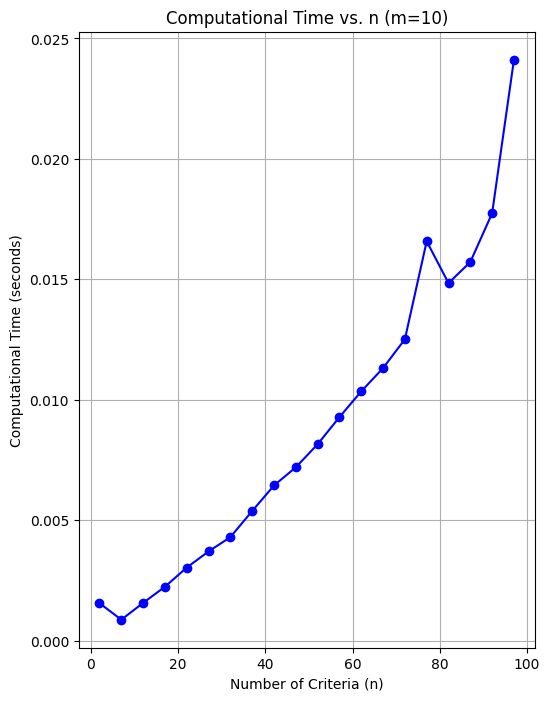

In [ ]:
# Plot Results
plt.figure(figsize=(20, 8))# Figure 1: CT vs. n (for fixed m)
plt.subplot(1, 3, 1)
plt.plot(n_values, CT_n, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Criteria (n)')
plt.ylabel('Computational Time (seconds)')
plt.title(f'Computational Time vs. n (m={fixed_m})')
plt.grid()

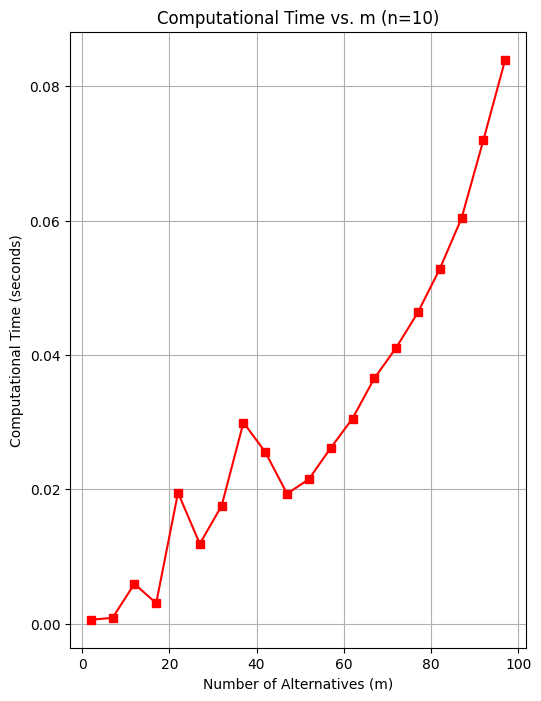

In [ ]:
# Figure 2: CT vs. m (for fixed n)
plt.figure(figsize=(20, 8))# Figure 1: CT vs. n (for fixed m)
plt.subplot(1, 3, 2)
plt.plot(m_values, CT_m, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Alternatives (m)')
plt.ylabel('Computational Time (seconds)')
plt.title(f'Computational Time vs. m (n={fixed_n})')
plt.grid()

Text(0.5, 0.92, 'Computational Time vs. (n, m)')

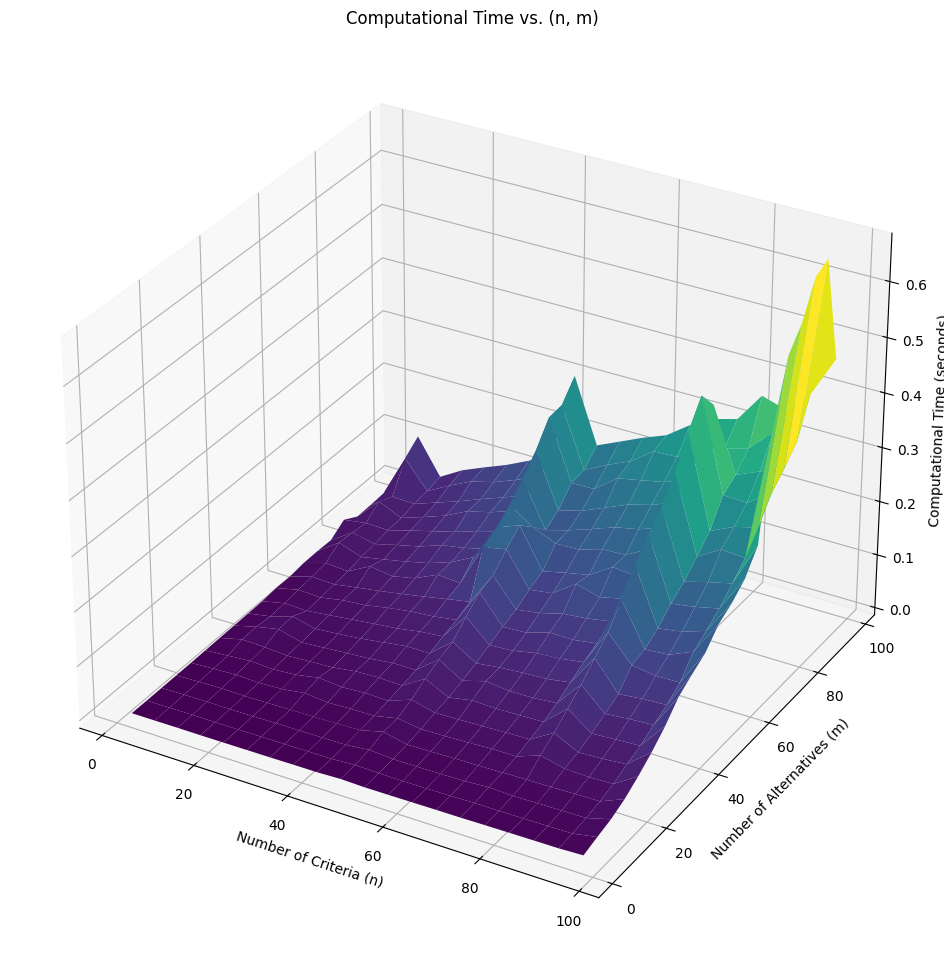

In [ ]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
N, M = np.meshgrid(n_values, m_values)
ax.plot_surface(N, M, CT_3D.T, cmap='viridis')
ax.set_xlabel('Number of Criteria (n)')
ax.set_ylabel('Number of Alternatives (m)')
ax.set_zlabel('Computational Time (seconds)')
ax.set_title('Computational Time vs. (n, m)')